In [2]:
from gensim.corpora import Dictionary 

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import requests
from collections import defaultdict 
from gensim.models import HdpModel

In [4]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    tokens = [token.translate(table) for token in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Remove empty tokens
    tokens = [token for token in tokens if token.strip()]
    
    return tokens


def create_dtm(text):
    dtm = defaultdict(dict)
    lines = text.strip().split('\n')        
    for line in lines:
        parts = line.split('\t')
        if len(parts) == 2:
            verse = parts[0]
            verse_text = parts[1]
            verse_text = preprocess_text(verse_text)
            for word in verse_text:
                if word in dtm[verse]:
                    dtm[verse][word] += 1
                else:
                    dtm[verse][word] = 1
                        
    return dtm

In [5]:
# Fetching text from URL
url = "https://openbible.com/textfiles/akjv.txt"
response = requests.get(url)

if response.status_code == 200:
    text = response.text

    # Preprocess the text
    preprocessed_text = ' '.join(preprocess_text(text))  # joining tokens back into a single string

    # Print preprocessed text
    print("Preprocessed text:", preprocessed_text[:100])  # printing only the first 100 characters for brevity

    # Create the Document-Term Matrix (DTM)
    dtm = create_dtm(text)

    # Print the DTM
    print("\nDocument-Term Matrix (DTM):")
    for verse, word_counts in dtm.items():
        print(verse)
        for word, count in word_counts.items():
            print(f"{word}: {count}", end=", ")
        print("\n")

else:
    print("Failed to fetch data from the URL:", response.status_code)

Preprocessed text: ï » ¿akjv american king jame version genesi 11 begin god creat heaven earth genesi 12 earth without 

Document-Term Matrix (DTM):
Genesis 1:1
begin: 1, god: 1, creat: 1, heaven: 1, earth: 1, 

Genesis 1:2
earth: 1, without: 1, form: 1, void: 1, dark: 1, face: 2, deep: 1, spirit: 1, god: 1, move: 1, water: 1, 

Genesis 1:3
god: 1, said: 1, let: 1, light: 2, 

Genesis 1:4
god: 2, saw: 1, light: 2, good: 1, divid: 1, dark: 1, 

Genesis 1:5
god: 1, call: 2, light: 1, day: 2, dark: 1, night: 1, even: 1, morn: 1, first: 1, 

Genesis 1:6
god: 1, said: 1, let: 2, firmament: 1, middl: 1, water: 3, divid: 1, 

Genesis 1:7
god: 1, made: 1, firmament: 3, divid: 1, water: 2, 

Genesis 1:8
god: 1, call: 1, firmament: 1, heaven: 1, even: 1, morn: 1, second: 1, day: 1, 

Genesis 1:9
god: 1, said: 1, let: 2, water: 1, heaven: 1, gather: 1, togeth: 1, one: 1, place: 1, dri: 1, land: 1, appear: 1, 

Genesis 1:10
god: 2, call: 2, dri: 1, land: 1, earth: 1, gather: 1, togeth: 1, water: 1

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [6]:
# Step 1: Preprocess text
preprocessed_text = [preprocess_text(verse_text) for verse_text in text.split('\n') if len(verse_text.split('\t')) == 2]

# Step 2: Create a dictionary and document-term matrix
dictionary = Dictionary(preprocessed_text)
corpus = [dictionary.doc2bow(text) for text in preprocessed_text]

# Step 3: Apply HDP model
hdp_model = HdpModel(corpus, dictionary)

# Get topics
topics = hdp_model.show_topics()
for topic in topics:
    print(topic)

(0, '0.026*shall + 0.019*lord + 0.012*said + 0.012*king + 0.011*god + 0.007*2 + 0.007*israel + 0.007*1 + 0.007*come + 0.007*say + 0.006*son + 0.006*man + 0.006*day + 0.006*hous + 0.005*psalm + 0.005*peopl + 0.005*one + 0.005*came + 0.004*chronicl + 0.004*go')
(1, '0.021*shall + 0.012*lord + 0.008*said + 0.007*god + 0.006*1 + 0.006*king + 0.006*offer + 0.005*2 + 0.005*son + 0.004*samuel + 0.004*israel + 0.004*one + 0.004*say + 0.004*came + 0.004*hous + 0.004*man + 0.004*day + 0.003*come + 0.003*hand + 0.003*peopl')
(2, '0.007*shall + 0.005*lord + 0.003*said + 0.003*god + 0.003*king + 0.002*son + 0.002*1 + 0.002*israel + 0.002*day + 0.002*man + 0.002*hous + 0.002*2 + 0.002*say + 0.002*come + 0.001*one + 0.001*came + 0.001*peopl + 0.001*offer + 0.001*land + 0.001*went')
(3, '0.007*shall + 0.005*lord + 0.003*said + 0.003*god + 0.002*son + 0.002*king + 0.002*land + 0.002*1 + 0.002*came + 0.002*day + 0.002*israel + 0.002*hous + 0.002*man + 0.002*2 + 0.001*say + 0.001*come + 0.001*peopl + 0.0

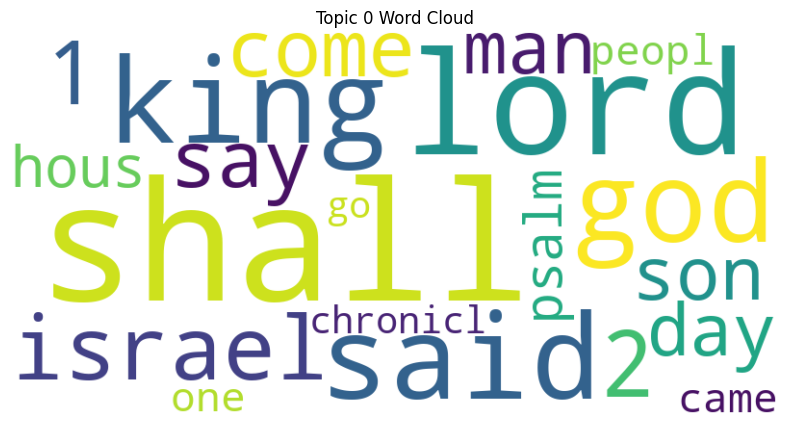

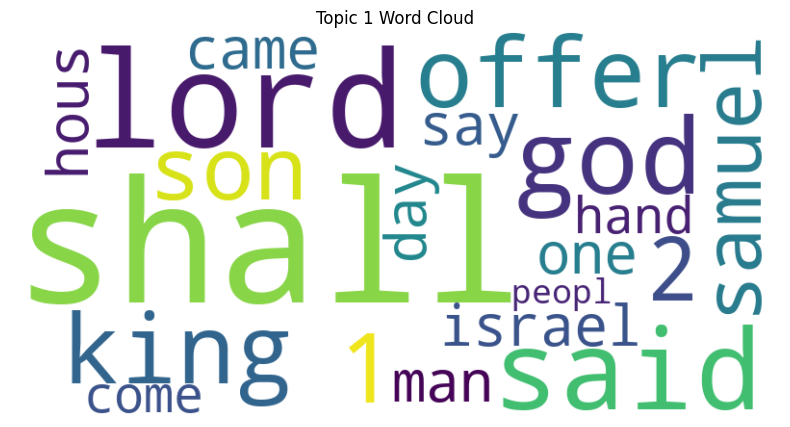

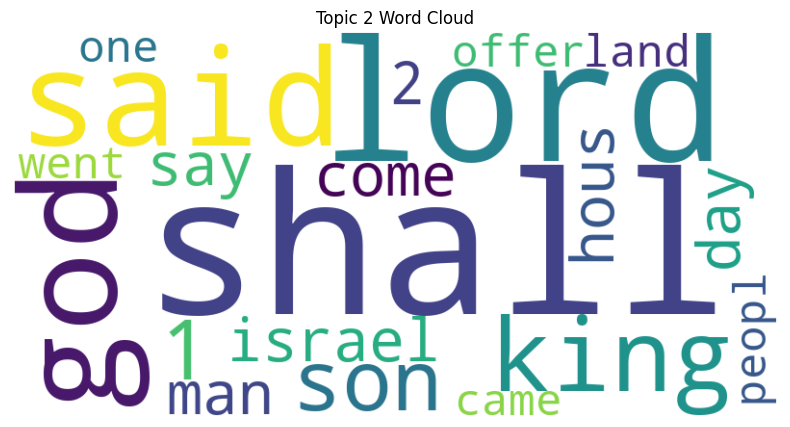

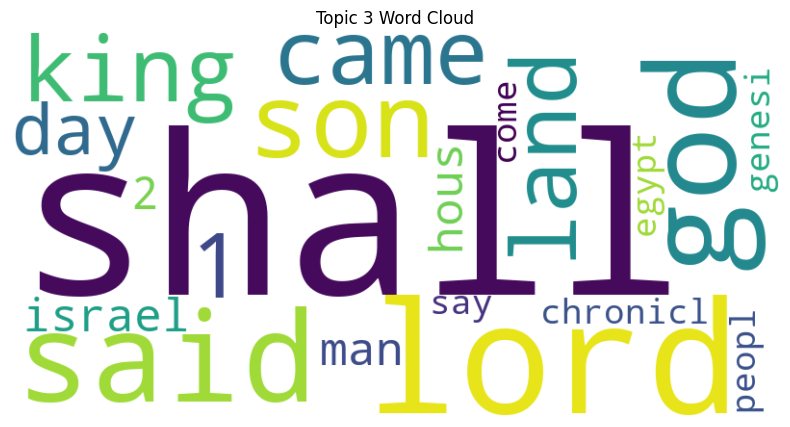

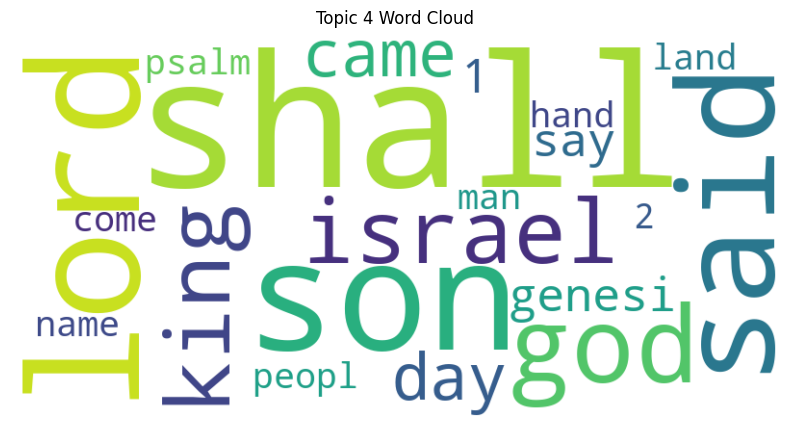

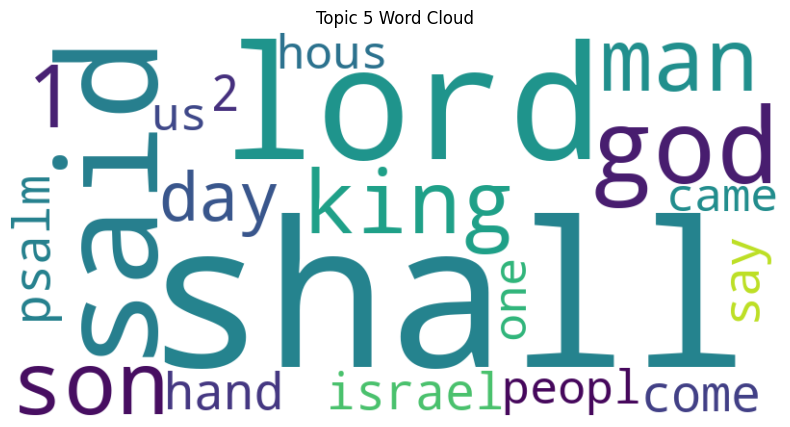

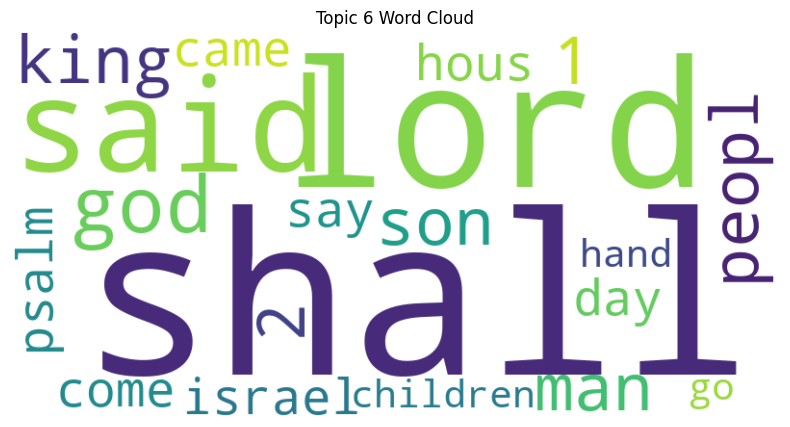

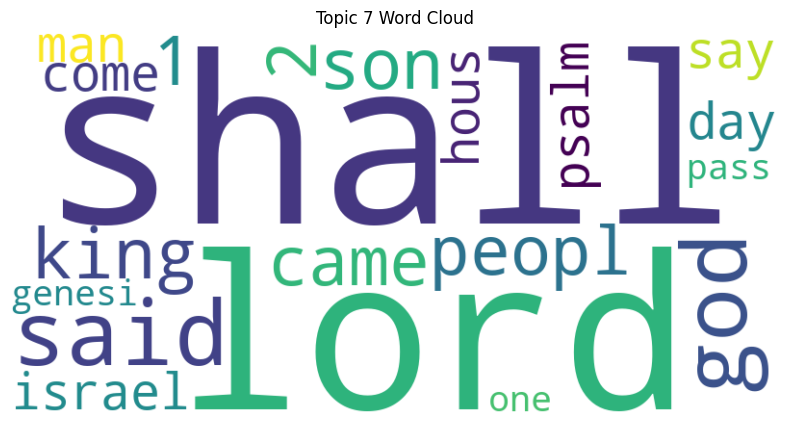

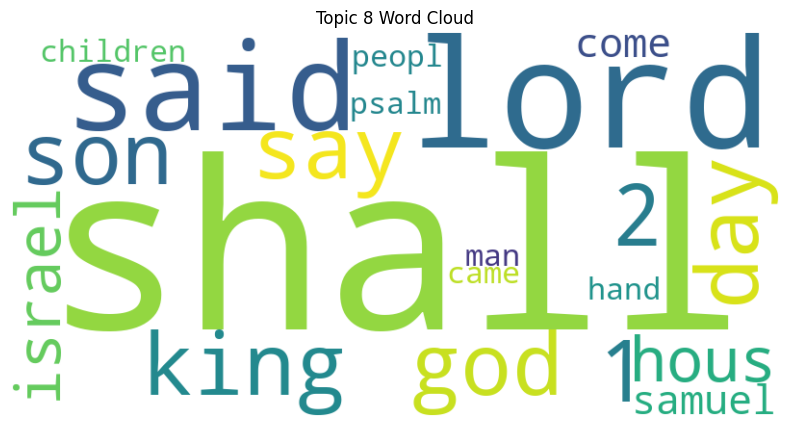

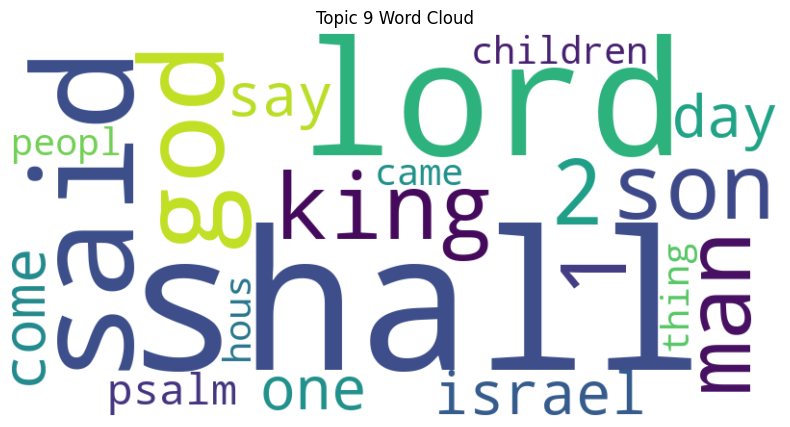

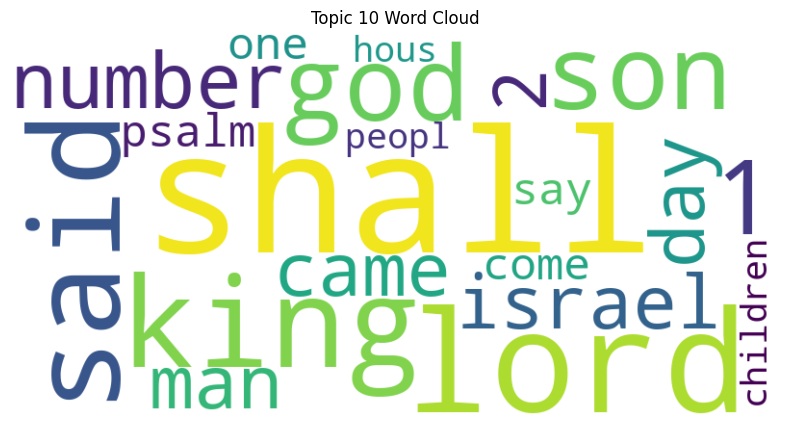

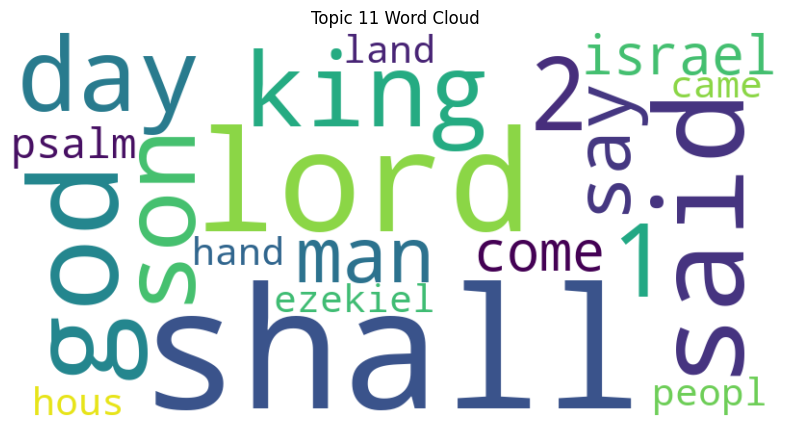

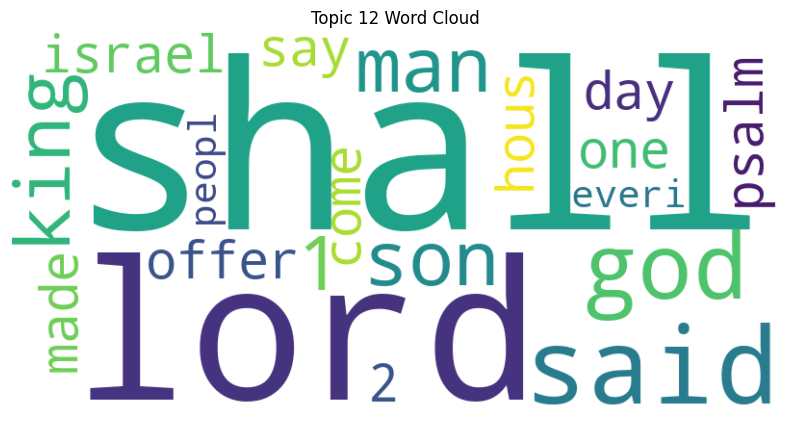

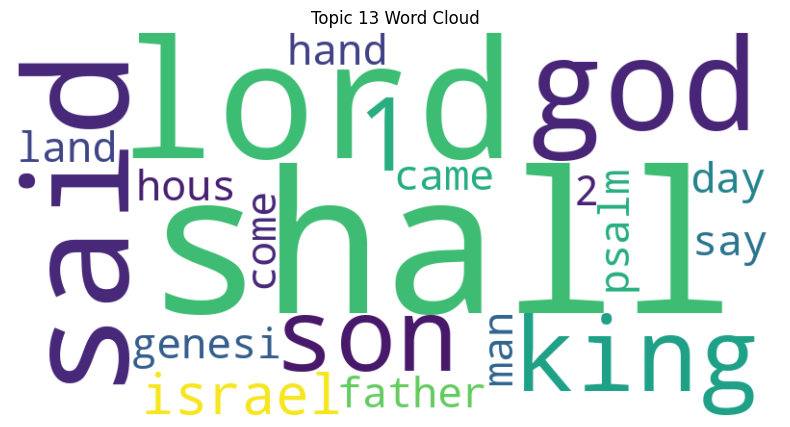

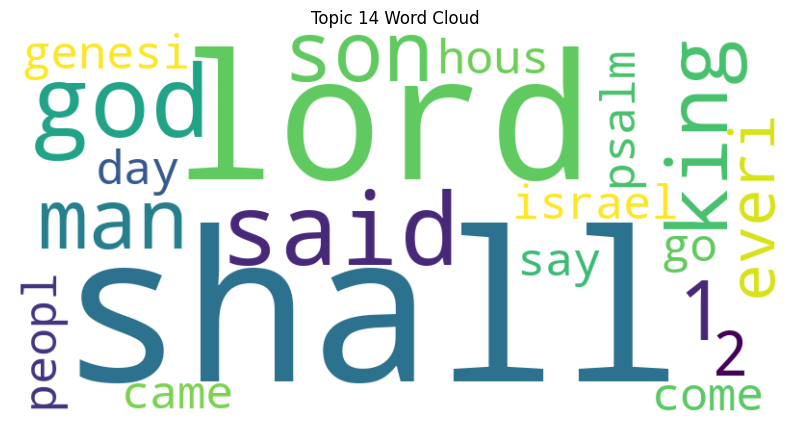

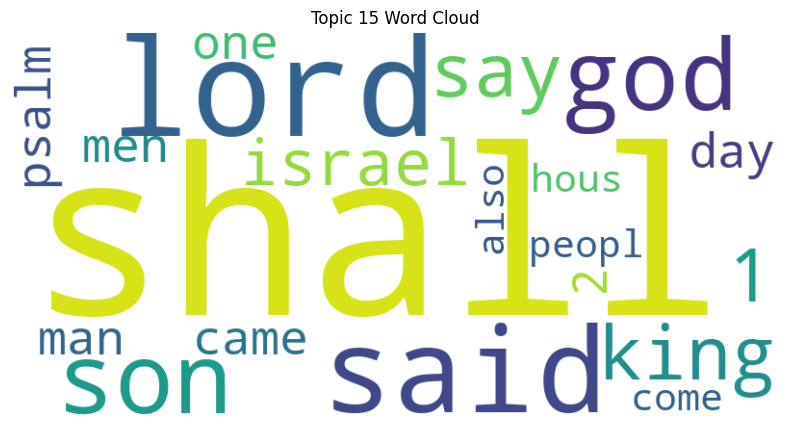

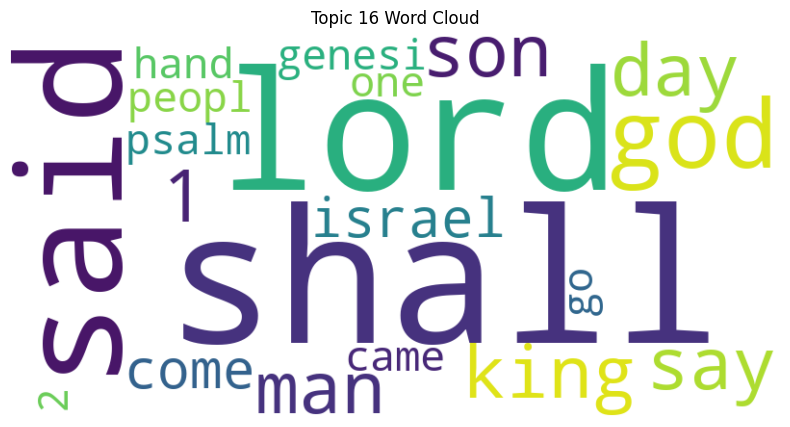

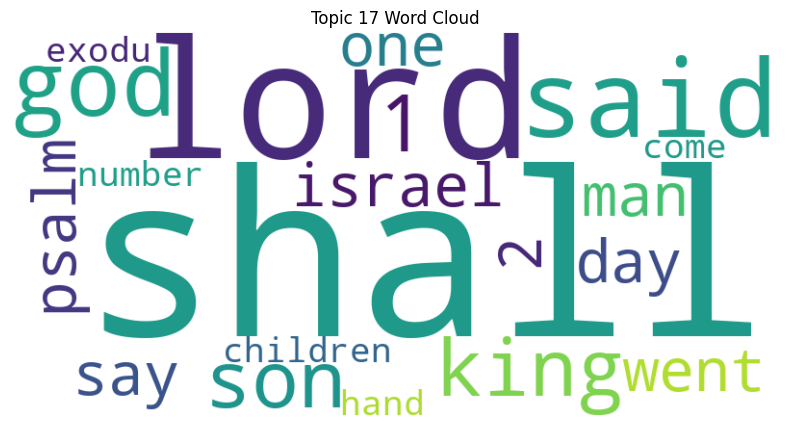

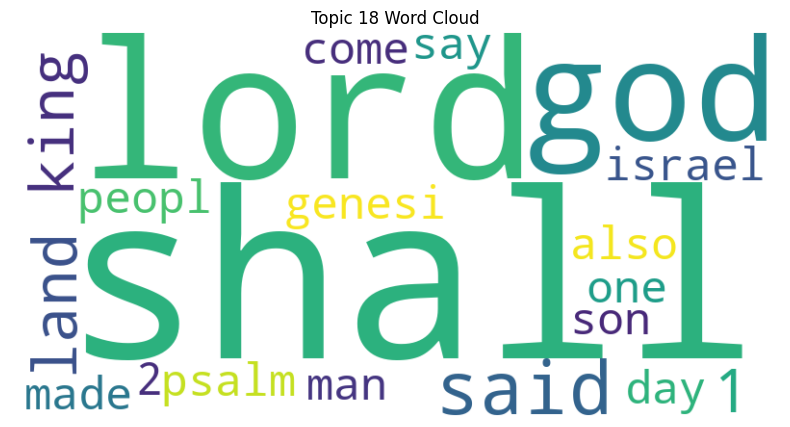

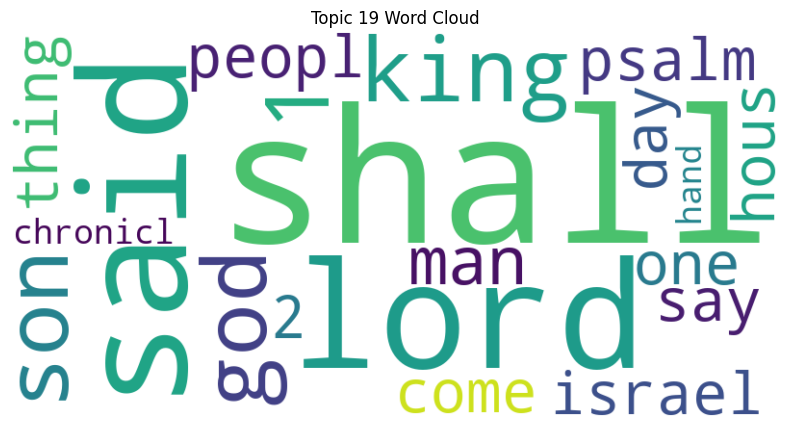

IndexError: index 66 is out of bounds for axis 0 with size 20

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Function to create word clouds for each topic
def create_wordclouds(hdp_model):
    topics = hdp_model.show_topics()
    for topic_id, topic in topics:
        word_freq = {word: float(freq) for freq, word in [pair.split('*') for pair in topic.split(' + ')]}
        wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_id} Word Cloud')
        plt.axis('off')
        plt.show()

# Function to plot topic distribution across documents
def plot_topic_distribution(hdp_model, corpus):
    topic_dist = hdp_model[corpus]
    topics = [dict(topic) for topic in topic_dist]
    topic_matrix = np.zeros((len(corpus), len(hdp_model.show_topics())))

    for doc_id, doc_topics in enumerate(topics):
        for topic_id, topic_prob in doc_topics.items():
            topic_matrix[doc_id][topic_id] = topic_prob

    plt.figure(figsize=(12, 6))
    plt.imshow(topic_matrix, aspect='auto', cmap='viridis')
    plt.colorbar(label='Probability')
    plt.title('Topic Distribution across Documents')
    plt.xlabel('Topic')
    plt.ylabel('Document')
    plt.show()

# Assuming `hdp_model` and `corpus` are already defined

# Visualize word clouds for each topic
create_wordclouds(hdp_model)

# Visualize topic distribution across documents
plot_topic_distribution(hdp_model, corpus)


In [15]:
if response.status_code == 200:
    text = response.text

    # Preprocess the text
    preprocessed_text = preprocess_text(text)

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(preprocessed_text)

    # Apply SVD to the TF-IDF matrix
    n_components = 20 # Number of topics
    lsa_model = TruncatedSVD(n_components=n_components, random_state=42)
    lsa_topic_matrix = lsa_model.fit_transform(X)

    # Print the top words for each topic
    terms = vectorizer.get_feature_names_out()
    for i, topic in enumerate(lsa_model.components_):
        top_terms_idx = topic.argsort()[:-11:-1]
        top_terms = [terms[idx] for idx in top_terms_idx]
        print(f"Topic {i}: {' | '.join(top_terms)}")
else:
    print("Failed to fetch data from the URL:", response.status_code)

Topic 0: shall | father | us | thing | jeremiah | men | samuel | therefor | ezekiel | chronicl
Topic 1: lord | us | went | genesi | even | made | offer | john | job | number
Topic 2: said | made | jeremiah | offer | exodu | us | father | thing | peopl | therefor
Topic 3: god | went | samuel | offer | made | exodu | even | john | number | thing
Topic 4: king | genesi | samuel | father | men | let | chronicl | everi | went | came
Topic 5: son | father | us | genesi | samuel | chronicl | men | thing | let | came
Topic 6: man | jeremiah | israel | peopl | father | make | made | luke | psalm | thing
Topic 7: day | israel | say | go | us | also | word | land | come | ezekiel
Topic 8: say | behold | went | jeremiah | man | peopl | make | land | come | let
Topic 9: israel | say | went | psalm | samuel | made | chronicl | exodu | citi | father
Topic 10: psalm | come | go | behold | also | land | went | genesi | hand | word
Topic 11: come | father | made | therefor | thing | hous | chronicl | sa

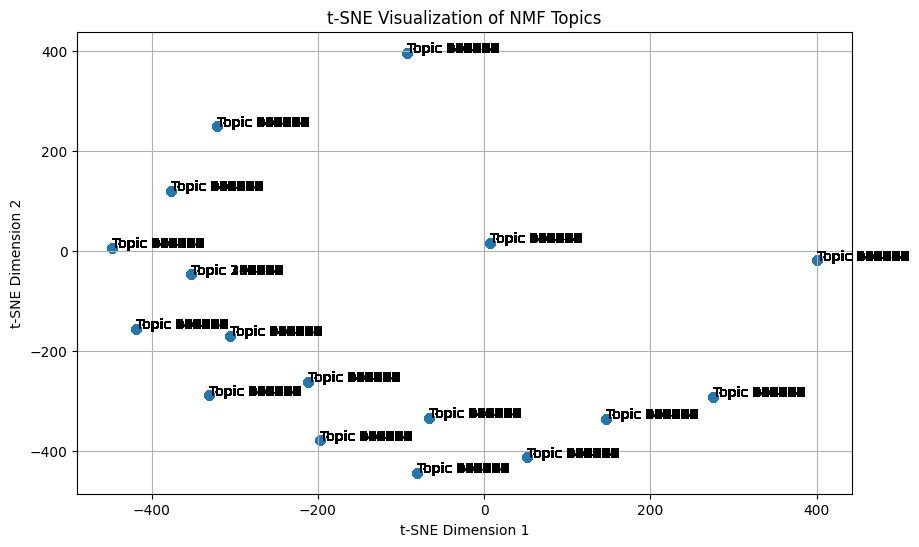

In [20]:
if response.status_code == 200:
    text = response.text

    # Preprocess the text
    preprocessed_text = preprocess_text(text)

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(preprocessed_text)

    # Apply NMF to the TF-IDF matrix
    n_components = 10  # Number of topics
    nmf_model = NMF(n_components=n_components, random_state=42)
    nmf_topic_matrix = nmf_model.fit_transform(X)

    # Visualize topics using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_topic_matrix = tsne.fit_transform(nmf_topic_matrix)

    # Plot t-SNE visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_topic_matrix[:, 0], tsne_topic_matrix[:, 1], marker='o')
    for i in range(len(tsne_topic_matrix)):
        plt.text(tsne_topic_matrix[i, 0], tsne_topic_matrix[i, 1], f"Topic {i+1}")
    plt.title("t-SNE Visualization of NMF Topics")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.grid(True)
    plt.show()
else:
    print("Failed to fetch data from the URL:", response.status_code)

In [19]:
import requests
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation


In [21]:
    # Print the topics
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(nmf_model.components_):
        print(f"Topic {topic_idx + 1}:")
        top_idx = topic.argsort()[:-11:-1]
        top_terms = [feature_names[i] for i in top_idx]
        print(", ".join(top_terms))

Topic 1:
shall, psalm, come, hous, peopl, came, one, children, chronicl, land
Topic 2:
lord, come, hous, peopl, came, hand, also, land, thing, children
Topic 3:
said, psalm, come, hous, came, peopl, one, hand, also, children
Topic 4:
god, psalm, come, peopl, hous, came, one, children, hand, chronicl
Topic 5:
king, psalm, come, one, hous, peopl, came, hand, also, children
Topic 6:
son, psalm, come, one, hand, peopl, came, land, also, go
Topic 7:
man, hous, peopl, came, one, also, thing, men, genesi, jeremiah
Topic 8:
day, psalm, come, hand, chronicl, number, genesi, made, offer, isaiah
Topic 9:
say, hous, came, hand, chronicl, thing, go, genesi, father, us
Topic 10:
israel, psalm, come, one, hand, also, thing, men, land, samuel
